# Introduction

### The max clique problem is a type of graph problem where the goal is to find the largest group of connected nodes in a graph. In this group, every node is directly connected to every other node.

### This problem can apply to different situations. For example, if the nodes represent people and an edge means two people know each other, then the max clique would be the largest group where everyone knows everyone else.

### One way to solve this is by using integer programming.






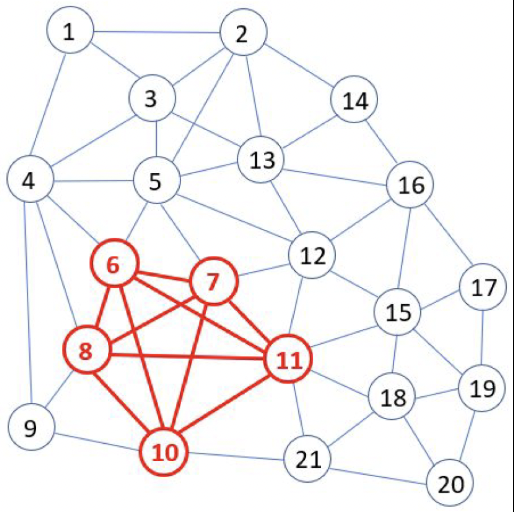

# Integer Program Problem Formulation

### In this Integer Program, each decision variable $x_i$ is a binary value: $x_i = 1$ if node i is part of the clique, and $x_i = 0$ if it's not. The goal is to maximize the total number of nodes in the clique, which means maximizing the sum of the $x_i$ values.

### If there were no constraints, the program would just include every node. To prevent that, we add a rule: if two nodes i and j are not connected by an edge, then at most one of them can be in the clique. This rule is added for every pair of nodes.

### These constraints make sure that only fully connected nodes are selected. So, the program finds the largest set of nodes where every node is connected to every other.

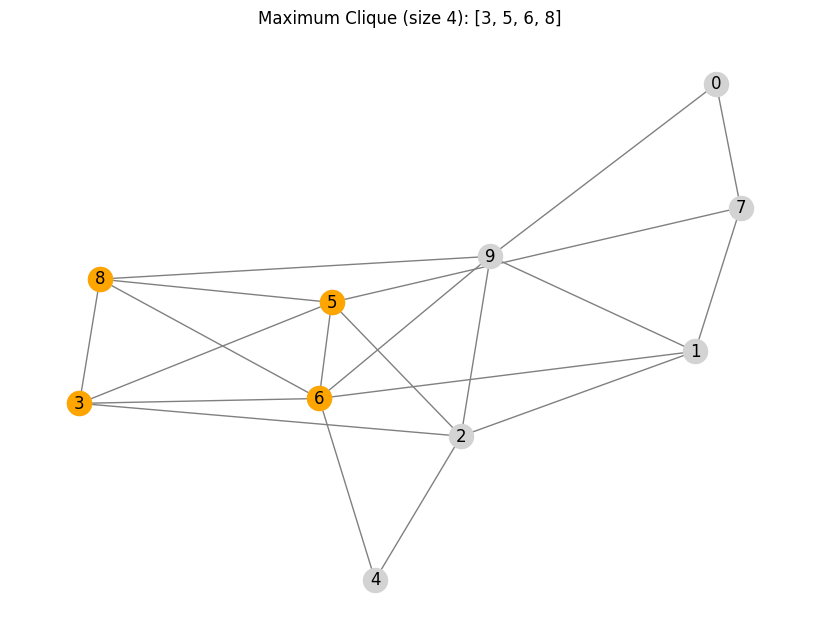

In [3]:
# !pip install pulp
# !pip install networkx
# !pip install matplotlib

import networkx as nx
import matplotlib.pyplot as plt
from pulp import LpProblem, LpVariable, lpSum, LpMaximize, LpBinary, PULP_CBC_CMD

def find_maximum_clique(G):
    model = LpProblem("Maximum_Clique_Problem", LpMaximize)

    node_vars = {node: LpVariable(f"select_{node}", cat=LpBinary) for node in G.nodes()}

    model += lpSum(node_vars.values())

    for a in G.nodes():
        for b in G.nodes():
            if a < b and not G.has_edge(a, b):
                model += node_vars[a] + node_vars[b] <= 1

    model.solve(PULP_CBC_CMD(msg=0))

    max_clique = [node for node in G.nodes() if node_vars[node].varValue == 1]
    return max_clique

def draw_clique(G, clique_nodes):
    layout = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 6))
    nx.draw(G, layout, with_labels=True, node_color='lightgray', edge_color='gray')
    nx.draw_networkx_nodes(G, layout, nodelist=clique_nodes, node_color='orange')
    plt.title(f"Maximum Clique (size {len(clique_nodes)}): {clique_nodes}")
    plt.show()

graph = nx.erdos_renyi_graph(n=10, p=0.5)

max_clique_nodes = find_maximum_clique(graph)
draw_clique(graph, max_clique_nodes)

### The code above creates a random graph with 10 nodes and then finds the largest clique in that graph.








